In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")



In [ ]:
df = pd.read_csv("cardekho_imputated.csv", index_col=[0])

In [ ]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [ ]:
df.drop('car_name', axis=1, inplace=True)
df.drop('brand', axis=1, inplace=True)

In [ ]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:

df.duplicated().sum()



167

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.000000,1.524400e+04,15244.000000,15244.000000,15244.000000,15244.000000,1.524400e+04
mean,6.041131,5.563958e+04,19.697333,1486.171543,100.607652,5.326161,7.747014e+05
std,3.016228,5.176630e+04,4.169307,520.419390,42.915687,0.808760,8.946761e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.590000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [ ]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


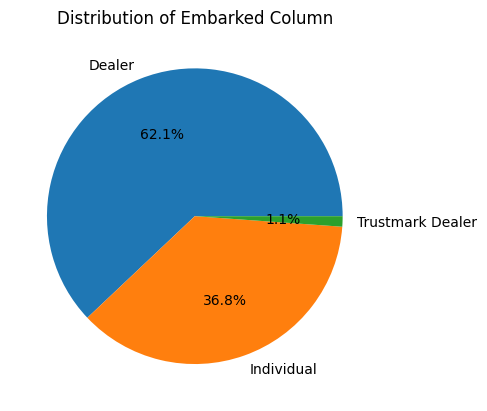

In [ ]:
model_counts = df['seller_type'].value_counts()

plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Embarked Column')
plt.show()

<Axes: xlabel='transmission_type', ylabel='count'>

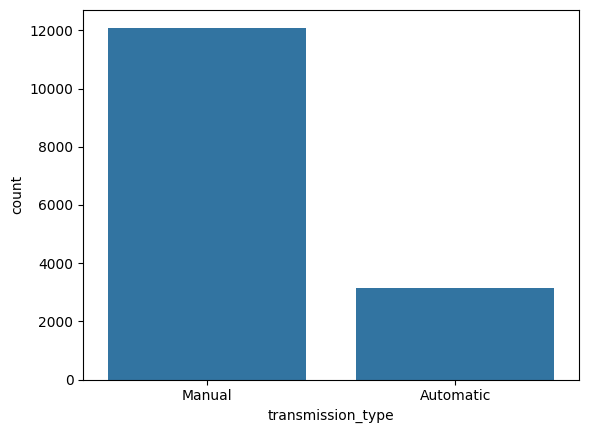

In [ ]:
sns.countplot(x='transmission_type', data=df)

In [ ]:
corr = df.corr(numeric_only=True)
corr

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.332725,-0.257599,0.098734,0.004356,0.030268,-0.241228
km_driven,0.332725,1.000000,-0.104979,0.192721,0.044776,0.192026,-0.079548
mileage,-0.257599,-0.104979,1.000000,-0.632161,-0.532172,-0.439943,-0.305128
engine,0.098734,0.192721,-0.632161,1.000000,0.807287,0.551401,0.585713
max_power,0.004356,0.044776,-0.532172,0.807287,1.000000,0.172264,0.751058
seats,0.030268,0.192026,-0.439943,0.551401,0.172264,1.000000,0.115299
selling_price,-0.241228,-0.079548,-0.305128,0.585713,0.751058,0.115299,1.000000


<Axes: >

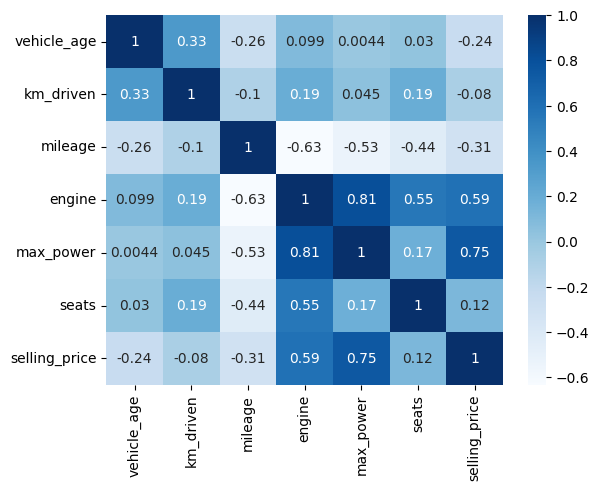

In [ ]:
sns.heatmap(corr, annot=True, cmap='Blues')

In [ ]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [ ]:
len(df['model'].unique())

120

In [ ]:
df['model'].value_counts()

,count
model,
i20,898
Swift Dzire,875
Swift,774
Alto,768
City,750
...,...
Ghibli,1
C,1
Ghost,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['model']=le.fit_transform(df['model'])

In [ ]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,7,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,54,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,118,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,7,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,38,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
len(df['seller_type'].unique()),len(df['fuel_type'].unique()),len(df['transmission_type'].unique())

(3, 5, 2)

In [ ]:
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']


In [ ]:
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['seller_type','fuel_type','transmission_type']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
        ("StandardScaler", numeric_transformer, num_features)

    ],remainder='passthrough'

)

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['seller_type', 'fuel_type',
                                  'transmission_type']),
                                ('StandardScaler', StandardScaler(),
                                 Index(['model', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats'],
      dtype='object'))])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((12195, 10), (3049, 10))

In [ ]:
X_train=preprocessor.fit_transform(X_train)

In [ ]:
X_test=preprocessor.transform(X_test)

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.551812,-0.347650,-0.313297,1.166383,-0.450611,-0.278238,2.093957
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.044719,3.285533,0.823151,-1.368036,-0.809634,-0.844091,-0.401480
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.907087,1.303797,0.586519,0.207544,0.221358,0.070513,-0.401480
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.686876,0.643218,0.008475,-1.440310,0.605341,1.321164,-0.401480
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.053768,-0.677940,1.296414,0.802603,-0.928669,-0.774803,-0.401480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12190,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.221496,-1.008229,-0.407334,1.041108,-0.569645,-0.613823,-0.401480
12191,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.221496,-1.008229,-1.106155,-0.187555,-0.548526,-0.431595,-0.401480
12192,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.056337,-0.347650,0.728498,-1.445128,1.747688,1.091358,3.341675
12193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.439138,-1.338519,-1.069903,0.727919,-1.312651,-1.083366,-0.401480


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    r2_square = r2_score(true, predicted)
    return mae, r2_square

In [ ]:
## Beginning Model Training
models = [LinearRegression(), KNeighborsRegressor() , DecisionTreeRegressor(),RandomForestRegressor() ]


for model in models:
    model.fit(X_train, y_train)


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    model_train_mae , model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(type(model).__name__)

    print('Model performance for Training set')
    print("- Mean Absolute Error:" ,model_train_mae)
    print("- R2 Score:", model_train_r2)

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Mean Absolute Error:" ,model_test_mae)
    print("- R2 Score:", model_test_r2)

    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Mean Absolute Error: 275284.3899581493
- R2 Score: 0.6224216387180522
----------------------------------
Model performance for Test set
- Mean Absolute Error: 262717.18861080665
- R2 Score: 0.6717231990253707


KNeighborsRegressor
Model performance for Training set
- Mean Absolute Error: 91454.63509635096
- R2 Score: 0.8931927462499339
----------------------------------
Model performance for Test set
- Mean Absolute Error: 112497.85995408331
- R2 Score: 0.8305031144071374


DecisionTreeRegressor
Model performance for Training set
- Mean Absolute Error: 4798.996856635234
- R2 Score: 0.9995434497991564
----------------------------------
Model performance for Test set
- Mean Absolute Error: 130609.45118618125
- R2 Score: 0.812362107011906


RandomForestRegressor
Model performance for Training set
- Mean Absolute Error: 40314.31727796145
- R2 Score: 0.9813253899171192
----------------------------------
Model performance for Test set
- M

In [ ]:
#Initialize few parameter for Hyperparamter tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}


In [ ]:

from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                   param_distributions=rf_params,
                                   n_iter=20,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
random.fit(X_train, y_train)

print(f"---------------- Best Params -------------------")
print(random.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
---------------- Best Params -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}


In [ ]:
model = RandomForestRegressor(n_estimators= 500, min_samples_split= 2, max_features= 8, max_depth = 15)
model.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae , model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae , model_test_r2 = evaluate_model(y_test, y_test_pred)


print(type(model).__name__)

print('Model performance for Training set')
print("- Mean Absolute Error:" ,model_train_mae)
print("- R2 Score:", model_train_r2)

print('----------------------------------')

print('Model performance for Test set')
print("- Mean Absolute Error:" ,model_test_mae)
print("- R2 Score:", model_test_r2)

print('='*35)
print('\n')

RandomForestRegressor
Model performance for Training set
- Mean Absolute Error: 54124.44694362756
- R2 Score: 0.9773423352514738
----------------------------------
Model performance for Test set
- Mean Absolute Error: 99601.31384454087
- R2 Score: 0.8796290159025608




In [ ]:
knn_reg = KNeighborsRegressor()


param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}


random = RandomizedSearchCV(estimator=knn_reg, param_distributions=param_grid, n_iter=20, cv=5, random_state=42, n_jobs=-1)

random.fit(X_train, y_train)
print(f"---------------- Best Params -------------------")
print(random.best_params_)

In [ ]:

dt_reg = DecisionTreeRegressor()


param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


random = RandomizedSearchCV(estimator=dt_reg, param_distributions=param_grid, n_iter=20, cv=5, random_state=42, n_jobs=-1)

random.fit(X_train, y_train)
print(f"---------------- Best Params -------------------")
print(random.best_params_)

In [ ]:
from sklearn.svm import SVR
svr = SVR()


param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
}

random = RandomizedSearchCV(estimator=svr, param_distributions=param_grid, n_iter=20, cv=5, random_state=42, n_jobs=-1)

random.fit(X_train, y_train)
print(f"---------------- Best Params-------------------")
print(random.best_params_)